## Assignment 3, part 2 of 2

Viswanatha Sharma Chepuri

In [ ]:
#Answer 1 . 
#Importing the required necessary libraries
import pandas as pd
import numpy as np
from statsmodels import api
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


the outliers are  [3.25]
The mean of the given precipitation observations is  22.534999999999997
The variance is  37.57745833333333


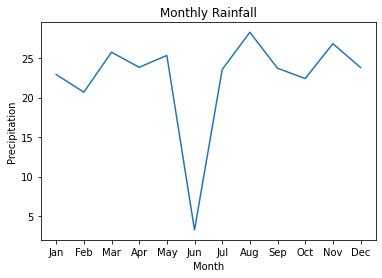

In [ ]:
#Code to find the outlier implementing Maximum Likelihood Outlier Method
import statistics
precip=np.array([22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82])
mean = precip.mean() #calculating mean  
std = precip.std() #calculating standard deviation

# x is greatere than mean + 3*std or less than difference between mean and thrice of std. Maximum Likelihood Estimation Condition

def check_outlier(val, mean, std):
    if val > (mean + 3*std) or val < (mean - 3*std):   #Implementing Maximum Likelihood Estimation.
        return 1
    else:
        return 0

outliers = []
for i in precip:
    if check_outlier(i, mean, std):
        outliers.append(i)
print("the outliers are ", outliers)

months= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months,precip)
plt.title('Monthly Rainfall')
plt.ylabel('Precipitation')
plt.xlabel('Month')
#Now finding the Mean of the given data
mean_precip=np.mean(precip)
var = statistics.pvariance(precip)
print("The mean of the given precipitation observations is ", mean_precip)
print('The variance is ', var)

Answer 2

In [ ]:
from pandas import read_csv
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
# Loading the dataset of master housing csv
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
#Performing normalization by Z scores
df = (df - df.mean())/df.std() 

In [ ]:
pca_housing = PCA(n_components=2)
pca_housing.fit(df)
projected = pca_housing.transform(df)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,df.shape[0]+1))

In [ ]:
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors # Implementing Nearest Neighbors.
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(projected.values)
distances, indices = nbrs.kneighbors(projected.values)

outlier_score = distances[:,knn-1]
print(outlier_score)

[0.11524415 0.0995715  0.12543079 0.18540772 0.18540772 0.20986738
 0.04552462 0.03561973 0.08359618 0.09145453 0.09708946 0.11401827
 0.09560245 0.05623191 0.09124282 0.05623191 0.16464511 0.08301653
 0.07863881 0.07449641 0.14868058 0.0334887  0.10224067 0.11843898
 0.10281703 0.13711783 0.10948327 0.13711783 0.08359618 0.05966633
 0.14890173 0.02495684 0.15538409 0.11843898 0.19069947 0.03456828
 0.15628148 0.04212779 0.02416196 0.03710437 0.17854888 0.12600042
 0.03916082 0.03658868 0.05902875 0.13577293 0.01580982 0.09145453
 0.08301653 0.07453243 0.12586097 0.18844213 0.11838355 0.16199356
 0.96410249 0.279477   0.14245878 0.2094455  0.15366256 0.18508738
 0.07675926 0.20546875 0.04396475 0.14162849 0.07763991 0.08284306
 0.05482193 0.13422281 0.13060881 0.17101263 0.05044152 0.18715116
 0.05044152 0.06486098 0.20072703 0.14846023 0.09124282 0.06899949
 0.06899949 0.14846023 0.07427865 0.15159468 0.00933957 0.09384804
 0.1143065  0.04290201 0.09560245 0.09763233 0.14822245 0.1646

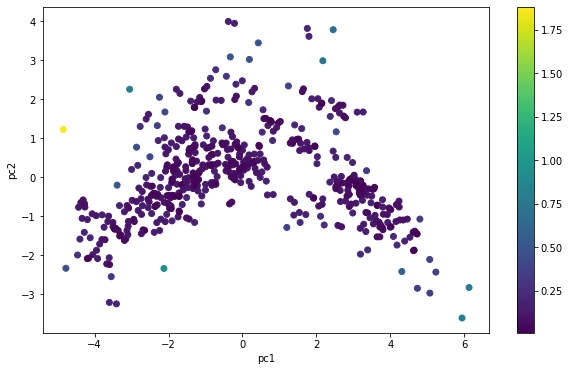

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(projected.pc1,projected.pc2,c=outlier_score,cmap='viridis')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
fig.colorbar(p)
plt.show()

In [ ]:
print(pca.components_,pca.explained_variance_)

[[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924257
   0.3136706  -0.32154387  0.31979277  0.33846915  0.20494226 -0.20297261
   0.30975984]
 [-0.31525236 -0.32331292  0.11249287  0.45482914  0.21911554  0.14933155
   0.31197777 -0.34907001 -0.27152104 -0.23945353 -0.30589695  0.23855944
  -0.07432202]] [6.12684883 1.43327512]


3. **[1 mark]** Consider the *absenteeism.csv* data set.

In [ ]:
df = pd.read_csv("absenteeism.csv", header="infer", delimiter=";")
df[df["ID"]==23]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
200,23,19,4,4,3,378,49,11,36,326.452,...,0,1,2,0,1,4,65,174,21,8
215,23,0,5,4,3,378,49,11,36,378.884,...,1,1,2,0,1,4,65,174,21,0
232,23,22,6,5,3,378,49,11,36,377.550,...,0,1,2,0,1,4,65,174,21,8
322,23,1,11,2,4,378,49,11,36,284.031,...,0,1,2,0,1,4,65,174,21,8
336,23,0,11,6,4,378,49,11,36,284.031,...,1,1,2,0,1,4,65,174,21,0
397,23,22,3,3,2,378,49,11,36,244.387,...,0,1,2,0,1,4,65,174,21,8
690,23,0,5,4,3,378,49,11,36,237.656,...,1,1,2,0,1,4,65,174,21,0
710,23,22,6,5,3,378,49,11,36,275.089,...,0,1,2,0,1,4,65,174,21,8


a. The "ID" column is the employee identifier. Consider the number of absences for each employee and find outliers among those values. Use Grubb's test with $\alpha=0.1$ to find said outliers.
 
Use this website for reference if you have doubts: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h1.htm

Note: the code below can be used to compute the squared upper critical value at a significance of $\alpha/(2N)$ with $N-2$ degrees of freedom.

In [ ]:
from scipy.stats import t
N = 10
alpha=0.05
t2 = t.interval( 1-alpha/N, N-2)[1]**2
t2

14.688199473513881

b. The attribute "Reason for absence" is categorical. The label "26" corresponds to "Unjustified absence". Again, consider the number of absences for each employee. However, now you must find contextual outliers among cases of unjustified absences, again using Grubb's test with $\alpha=0.1$.

-------------------------

For the next exercise we will consider the following implementation of the Nested-Loops algorithm to detect outliers.

It takes as arguments a numerical dataset $X$ (in numpy array form), a radius $r$ and a threshold $\pi$. It returns a list of outliers (points having less than $\pi\times n$ neighbours within a distance of at most $r$).

The implementation assumes access to a distance function, defined in the cell below as well.

In [ ]:
from outliers import smirnov_grubbs as grubbs
count_ab = pd.DataFrame(df.groupby('ID')['ID'].count())
test = grubbs.min_test(count_ab['ID'], alpha=0.1)
count_ab['Grubbs Test'] = test
print(count_ab)


     ID  Grubbs Test
ID                  
1    23         23.0
2     6          6.0
3   113          NaN
4     1          1.0
5    19         19.0
6     8          8.0
7     6          6.0
8     2          2.0
9     8          8.0
10   24         24.0
11   40         40.0
12    7          7.0
13   15         15.0
14   29         29.0
15   37         37.0
16    2          2.0
17   20         20.0
18   16         16.0
19    3          3.0
20   42         42.0
21    3          3.0
22   46         46.0
23    8          8.0
24   30         30.0
25   10         10.0
26    5          5.0
27    7          7.0
28   76         76.0
29    5          5.0
30    7          7.0
31    3          3.0
32    5          5.0
33   24         24.0
34   55         55.0
35    1          1.0
36   34         34.0


In [ ]:
abs = df.loc[df['Reason for absence'] == 26]
#print(absentees)
df_new = abs['ID']
count = pd.DataFrame(abs.groupby('ID')['ID'].count())
test = grubbs.min_test(count['ID'], alpha=0.1)
count['Grubbs Test'] = test
count

,ID,Grubbs Test
ID,,
1,2,2
3,1,1
5,9,9
11,6,6
13,2,2
18,2,2
20,4,4
24,2,2
33,1,1


In [ ]:
from outliers import smirnov_grubbs as grubbs
absentees_count = pd.DataFrame(df.groupby('ID')['ID'].count())
test = grubbs.min_test(absentees_count['ID'], alpha=0.1)
absentees_count['grubs_test'] = test
print(absentees_count)
print("From the below table the outlier is 113")

absentees = df.loc[df['Reason for absence'] == 26]
#print(absentees)
df_new = absentees['ID']
absentees_count = pd.DataFrame(absentees.groupby('ID')['ID'].count())
test = grubbs.min_test(absentees_count['ID'], alpha=0.1)
absentees_count['grubs_test'] = test
absentees_count

     ID  grubs_test
ID                 
1    23        23.0
2     6         6.0
3   113         NaN
4     1         1.0
5    19        19.0
6     8         8.0
7     6         6.0
8     2         2.0
9     8         8.0
10   24        24.0
11   40        40.0
12    7         7.0
13   15        15.0
14   29        29.0
15   37        37.0
16    2         2.0
17   20        20.0
18   16        16.0
19    3         3.0
20   42        42.0
21    3         3.0
22   46        46.0
23    8         8.0
24   30        30.0
25   10        10.0
26    5         5.0
27    7         7.0
28   76        76.0
29    5         5.0
30    7         7.0
31    3         3.0
32    5         5.0
33   24        24.0
34   55        55.0
35    1         1.0
36   34        34.0
From the below table the outlier is 113


,ID,grubs_test
ID,,
1,2,2
3,1,1
5,9,9
11,6,6
13,2,2
18,2,2
20,4,4
24,2,2
33,1,1


In [ ]:
pip install outlier_utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install outliers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for outliers: filename=OUTLIERS-0.1-py3-none-any.whl size=1948 sha256=8f7aba4981359cfd9109c8573a30cfa993ee8ebdd85dbe33516b35ce55f47754
  Stored in directory: /root/.cache/pip/wheels/b0/28/5e/d5d2bff4f60c375f6f67cb77a466645d53f42036f9079c83cc
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=7b7a16819a36cd34e92f9eda050fc809aa8e63065c10800a71759573f209ae9b
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built outliers validators


In [ ]:
import numpy as np

distance = euclidean_distance

def detect_outliers(X, r, pi):
    N = X.shape[0]
    outliers = np.ones(N)
    for i in range(N):
        x = X[i,:]
        count = 0
        for j in range(N):
            if i == j: # No need to compute the distance of x to itself
                continue
            y = X[j,:]
            dist = distance(x,y)
            if dist <= r:
                count += 1
            if count >= pi*N:
                outliers[i] = 0
                break    
    return np.where(outliers)[0]

We can test it on the *normal.npy* dataset.

In [ ]:
X = np.load("normal.npy")
r=8
pi=0.1
outliers = detect_outliers(X, r, pi)
outliers

array([   6,  105,  136,  142,  177,  259,  342,  406,  488,  489,  656,
        690,  833,  892,  896,  916,  922,  928, 1017, 1106, 1177, 1265,
       1310, 1321, 1417, 1425, 1473, 1667, 1697, 1847])

This algorithm saves some time by breaking loops early, but it still very slow. We can test its performance as follows:

In [ ]:
%timeit detect_outliers(X, r, pi)

1 loop, best of 5: 6.55 s per loop
